# Complete code for loan prediction problem

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
train_df = pd.read_csv('C:/Users/B.THUSHAR/Desktop/ML projects/load prediction/train_ctrUa4K.csv', header=0)

In [3]:
test_df = pd.read_csv('C:/Users/B.THUSHAR/Desktop/ML projects/load prediction/test_lAUu6dG.csv', header=0)

<AxesSubplot:>

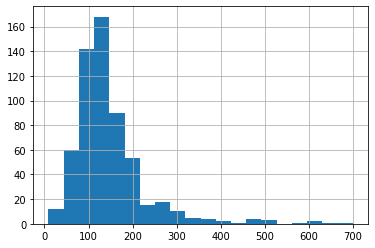

In [4]:
train_df['LoanAmount'].hist(bins=20)

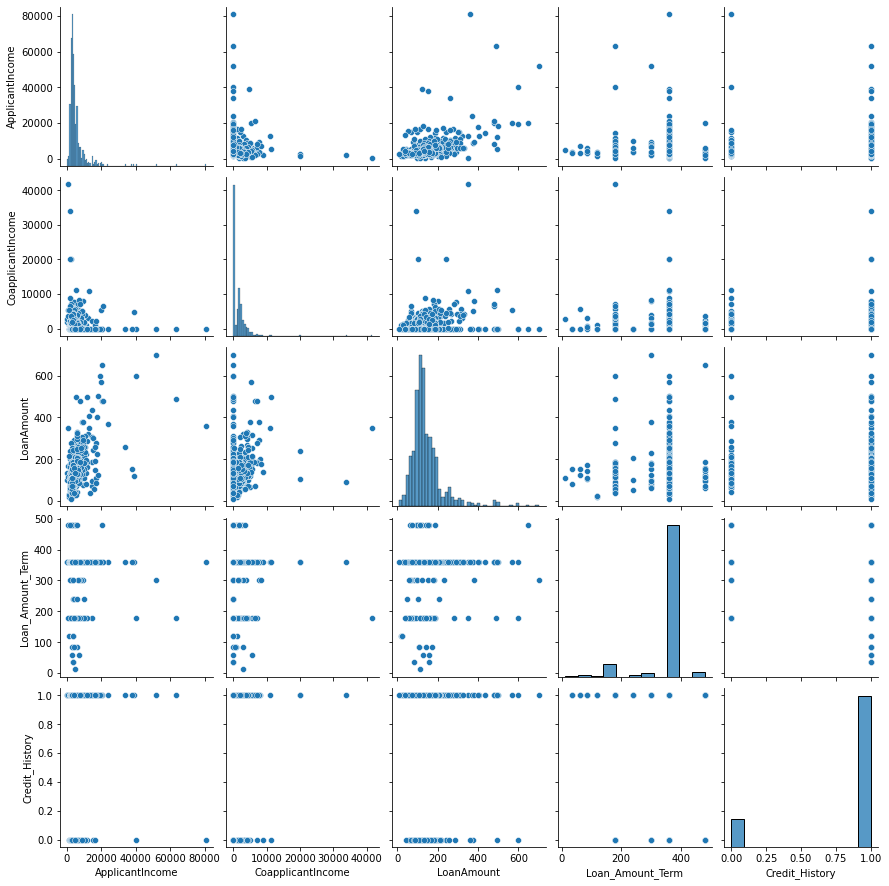

In [5]:
sns.pairplot(train_df)

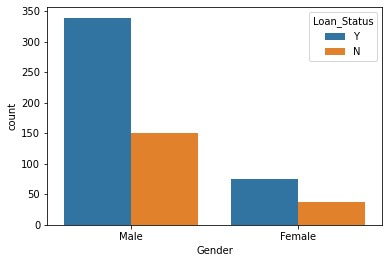

In [6]:
sns.countplot(x="Gender",hue="Loan_Status",data=train_df)

# Missing data filling

In [4]:
train_df['Dependents'] = train_df['Dependents'].map({"3+":3,"0":0,"1":1,"2":2})
train_df["Dependents"] = train_df["Dependents"].fillna(0)
train_df["Dependents"]=train_df["Dependents"].astype(np.int)
train_df["LoanAmount"]=train_df["LoanAmount"].fillna(train_df["LoanAmount"].mean())
train_df['Gender'] = train_df['Gender'].map({'Female':0,'Male':1})
train_df["Gender"] = train_df["Gender"].fillna(0).astype(int)
train_df['Self_Employed'] = train_df['Self_Employed'].map({'No':0, 'Yes':1})
train_df["Self_Employed"] = train_df["Self_Employed"].fillna(0).astype(int)
train_df['Education'] = train_df['Education'].map({'Not Graduate':0, 'Graduate':1})
train_df["Education"] = train_df["Education"].fillna(0).astype(int)
train_df['Married'] = train_df['Married'].map({'No':0, 'Yes':1})
train_df["Married"] = train_df["Married"].fillna(0).astype(int)
train_df['Loan_Status'] = train_df['Loan_Status'].map({'N':0, 'Y':1})
train_df=train_df.fillna(train_df.mean())                                                               

# Outliers removal

In [5]:
# train_df=train_df.fillna(train_df.mean())
uv=np.percentile(train_df.ApplicantIncome,99)
# train_df[(train_df.ApplicantIncome>uv)]
train_df.ApplicantIncome[(train_df.ApplicantIncome> 3*uv)] = 3*uv
uv1=np.percentile(train_df.CoapplicantIncome,99)
train_df.CoapplicantIncome[(train_df.CoapplicantIncome> 3*uv1)] = 3*uv1
uv2=np.percentile(train_df.LoanAmount,99)
train_df.LoanAmount[(train_df.LoanAmount> 3*uv2)] = 3*uv2
uv3=np.percentile(train_df.Loan_Amount_Term,99)
train_df.Loan_Amount_Term[(train_df.Loan_Amount_Term> 3*uv3)] = 3*uv3

C:\Users\B.THUSHAR\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\B.THUSHAR\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\B.THUSHAR\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

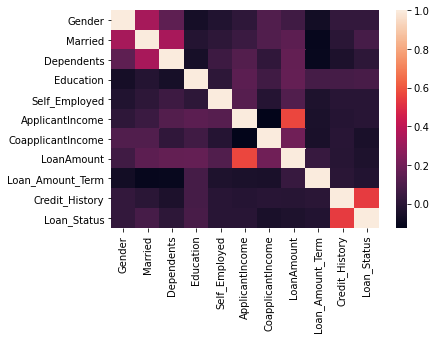

In [6]:
sns.heatmap(train_df.corr())

# Creating dummy variables

In [6]:
train_df=pd.get_dummies(train_df,columns=["Property_Area"],drop_first=True)

# Train data

In [7]:
train_x=train_df.iloc[:,train_df.columns!="Loan_Status"]
train_y=train_df["Loan_Status"]

In [8]:
train_x=train_x.iloc[:,1:]

In [9]:
train_x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1


# Splitting of the data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.2)

In [12]:
from sklearn import preprocessing

In [13]:
scalar=preprocessing.StandardScaler()
x_train_s=scalar.fit_transform(x_train)
x_test_s=scalar.fit_transform(x_test)

# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, confusion_matrix,accuracy_score,roc_auc_score,recall_score, roc_curve

In [22]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [23]:
confusion_matrix(y_train,log_model.predict(x_train))

array([[ 64,  92],
       [  9, 326]], dtype=int64)

In [24]:
confusion_matrix(y_test,log_model.predict(x_test))

array([[22, 14],
       [ 1, 86]], dtype=int64)

In [25]:

roc_curve(y_test,log_model.predict(x_test))

(array([0.        , 0.38888889, 1.        ]),
 array([0.        , 0.98850575, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [26]:
print("Recall score :{}  Accuracy : {}".format(recall_score(y_test,log_model.predict(x_test)),accuracy_score(y_test,log_model.predict(x_test))))

Recall score :0.9885057471264368  Accuracy : 0.8780487804878049


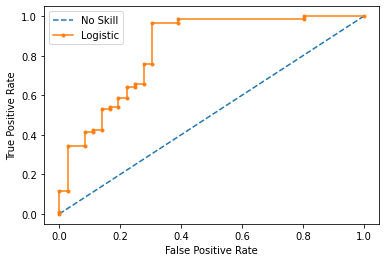

In [27]:
from matplotlib import pyplot
yhat = log_model.predict_proba(x_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# pos_probs = yhat
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Linear Discriminant analysis

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [29]:
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(x_train, y_train)
y_pred_lda = clf_lda.predict(x_train) 

In [30]:
confusion_matrix(y_train, y_pred_lda)

array([[ 62,  94],
       [  7, 328]], dtype=int64)

In [31]:
confusion_matrix(y_test, clf_lda.predict(x_test) )

array([[21, 15],
       [ 1, 86]], dtype=int64)

In [32]:
print("Recall score :{}  Accuracy : {}".format
      (recall_score(y_test,clf_lda.predict(x_test)),accuracy_score(y_test,clf_lda.predict(x_test))))

Recall score :0.9885057471264368  Accuracy : 0.8699186991869918


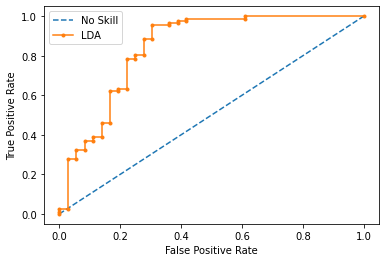

In [33]:
yhat = clf_lda.predict_proba(x_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# pos_probs = yhat
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='LDA')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# K NN classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn_1 = KNeighborsClassifier(n_neighbors=3)

In [35]:
clf_knn_1.fit(x_train_s, y_train)
accuracy_score(y_test, clf_knn_1.predict(x_test_s))

0.8373983739837398

In [36]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': [1, 2,  5,  8, 9,10,15,19,20,21,23]}
grid_search_cv = GridSearchCV(KNeighborsClassifier(), params)

In [37]:
grid_search_cv.fit(x_train_s, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 5, 8, 9, 10, 15, 19, 20, 21,
                                         23]})

In [38]:
grid_search_cv.best_params_

{'n_neighbors': 20}

In [39]:
optimised_KNN = grid_search_cv.best_estimator_
y_test_pred = optimised_KNN.predict(x_test_s) 

In [40]:
confusion_matrix(y_test, y_test_pred)

array([[18, 18],
       [ 0, 87]], dtype=int64)

In [41]:
print("Recall score :{}  Accuracy : {}".format
      (recall_score(y_test,optimised_KNN.predict(x_test_s)),accuracy_score(y_test,optimised_KNN.predict(x_test_s))))

Recall score :1.0  Accuracy : 0.8536585365853658


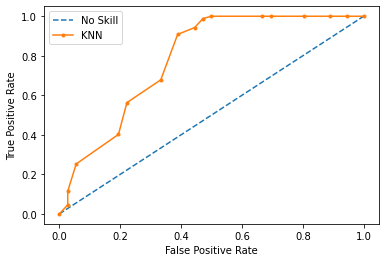

In [42]:
yhat = optimised_KNN.predict_proba(x_test_s)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# pos_probs = yhat
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='KNN')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Decision Tree

In [15]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth = 3)

In [16]:
clftree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [17]:
confusion_matrix(y_test, clftree.predict(x_test))

array([[23, 20],
       [ 1, 79]], dtype=int64)

In [18]:
print("Recall score :{}  Accuracy : {}".format
      (recall_score(y_test,clftree.predict(x_test)),accuracy_score(y_test,clftree.predict(x_test))))

Recall score :0.9875  Accuracy : 0.8292682926829268


In [20]:
dot_data = tree.export_graphviz(clftree, out_file=None,feature_names= x_train.columns, filled = True)
from IPython.display import Image
import pydotplus

In [21]:
dot_data = tree.export_graphviz(clftree, out_file=None,feature_names= x_train.columns, filled = True)

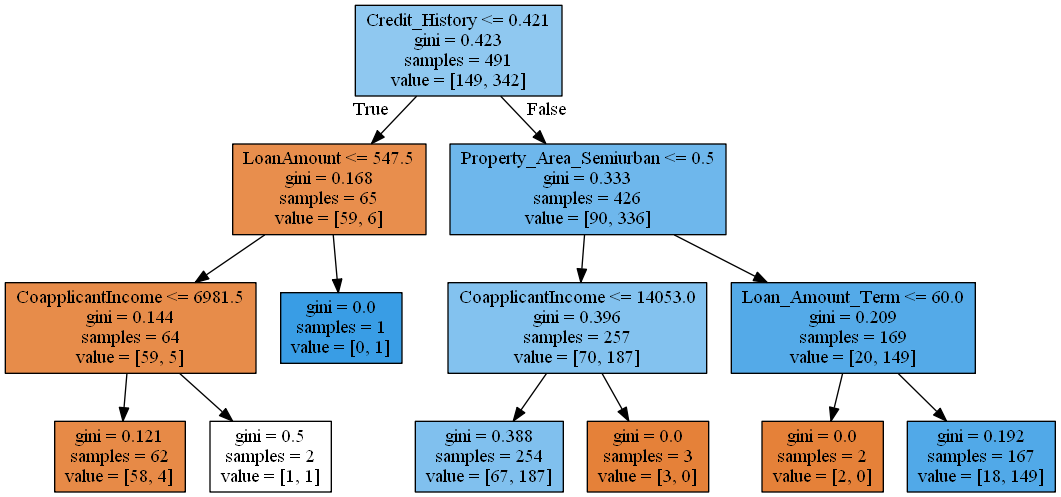

In [22]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Bagging

In [23]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()

In [24]:
from sklearn.ensemble import BaggingClassifier

In [25]:
bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [26]:
bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [27]:
confusion_matrix(y_test, bag_clf.predict(x_test))

array([[23, 20],
       [10, 70]], dtype=int64)

In [28]:
print("Recall score :{}  Accuracy : {}".format
      (recall_score(y_test,bag_clf.predict(x_test)),accuracy_score(y_test,bag_clf.predict(x_test))))

Recall score :0.875  Accuracy : 0.7560975609756098


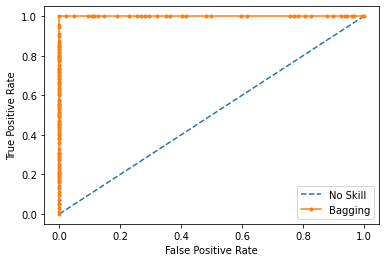

In [95]:
import matplotlib.pyplot as pyplot
yhat = bag_clf.predict_proba(x_train)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# pos_probs = yhat
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_train, pos_probs)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='Bagging')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=42)

In [31]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [33]:
confusion_matrix(y_test, rf_clf.predict(x_test))

array([[23, 20],
       [10, 70]], dtype=int64)

In [34]:
print("Recall score :{}  Accuracy : {}".format
      (recall_score(y_test,rf_clf.predict(x_test)),accuracy_score(y_test,rf_clf.predict(x_test))))

Recall score :0.875  Accuracy : 0.7560975609756098


In [36]:
rf_clf = RandomForestClassifier(n_estimators=250,random_state=42)

In [37]:
params_grid = {"max_features" : [4,5,6,7,8,9,10],
              "min_samples_split": [2, 3, 10],
              }

In [38]:
grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [39]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [40]:
grid_search.best_params_ 

{'max_features': 4, 'min_samples_split': 2}

In [41]:
cvrf_clf = grid_search.best_estimator_

In [42]:
confusion_matrix(y_test, cvrf_clf.predict(x_test))

array([[23, 20],
       [11, 69]], dtype=int64)

In [43]:
print("Recall score :{}  Accuracy : {}".format
      (recall_score(y_test,cvrf_clf.predict(x_test)),accuracy_score(y_test,cvrf_clf.predict(x_test))))

Recall score :0.8625  Accuracy : 0.7479674796747967


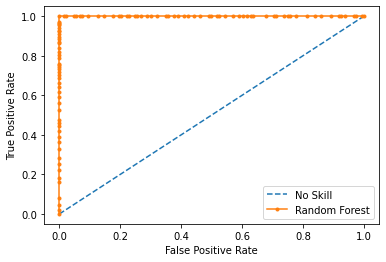

In [94]:
import matplotlib.pyplot as pyplot
yhat = cvrf_clf.predict_proba(x_train)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# pos_probs = yhat
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_train, pos_probs)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Gradient Boosting

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(x_train, y_train)





GradientBoostingClassifier()

In [46]:
confusion_matrix(y_test, gbc_clf.predict(x_test))

array([[23, 20],
       [ 4, 76]], dtype=int64)

In [47]:
print("Recall score :{}  Accuracy : {}".format
      (recall_score(y_test,gbc_clf.predict(x_test)),accuracy_score(y_test,gbc_clf.predict(x_test))))

Recall score :0.95  Accuracy : 0.8048780487804879


Applying grid search approach to find optimum learning parameters

In [48]:
gbc_clf = GradientBoostingClassifier()

param_test1 = {
 'max_depth':range(1,7,2),
    'learning_rate' : [0.1,0.2,0.3],
    'subsample':[0.8,0.9,1],
    'n_estimators':[10,100,200,500]
}

grid_search = GridSearchCV(gbc_clf, param_test1,
                           n_jobs=-1, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

gbc_clf = grid_search.best_estimator_

In [49]:
grid_search.best_params_ 

{'learning_rate': 0.3, 'max_depth': 1, 'n_estimators': 10, 'subsample': 0.9}

In [50]:
print("Recall score :{}  Accuracy : {}".format
      (recall_score(y_test,gbc_clf.predict(x_test)),accuracy_score(y_test,gbc_clf.predict(x_test))))

Recall score :0.9875  Accuracy : 0.8292682926829268


In [51]:
confusion_matrix(y_test, gbc_clf.predict(x_test))

array([[23, 20],
       [ 1, 79]], dtype=int64)

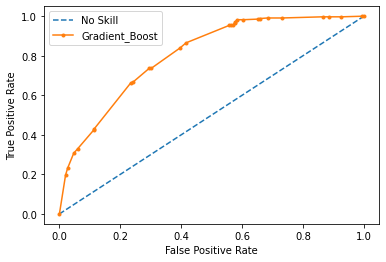

In [92]:
import matplotlib.pyplot as pyplot
yhat = gbc_clf.predict_proba(x_train)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# pos_probs = yhat
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_train, pos_probs)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='Gradient_Boost')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Ada boosting

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf_clf = RandomForestClassifier(n_estimators=250,random_state=42)

In [54]:
from sklearn.ensemble import AdaBoostClassifier

In [55]:
ada_clf = AdaBoostClassifier(rf_clf,learning_rate =0.1, n_estimators =1000,random_state=0)

In [56]:
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=250,
                                                         random_state=42),
                   learning_rate=0.1, n_estimators=1000, random_state=0)

In [57]:
print("Recall score :{}  Accuracy : {}".format
      (recall_score(y_test,ada_clf.predict(x_test)),accuracy_score(y_test,ada_clf.predict(x_test))))

Recall score :0.875  Accuracy : 0.7560975609756098


In [69]:
confusion_matrix(y_test, ada_clf.predict(x_test))

array([[23, 20],
       [10, 70]], dtype=int64)

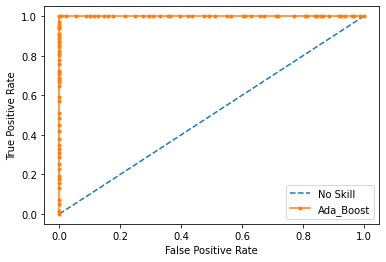

In [93]:
import matplotlib.pyplot as pyplot
yhat = ada_clf.predict_proba(x_train)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# pos_probs = yhat
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_train, pos_probs)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='Ada_Boost')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XG Boost

In [58]:
import xgboost as xgb

In [59]:
xgb_clf = xgb.XGBClassifier(max_depth=12, n_estimators=1000, learning_rate=0.3,
                            n_jobs=-1)

xgb_clf.fit(x_train, y_train)

C:\Users\B.THUSHAR\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:34:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

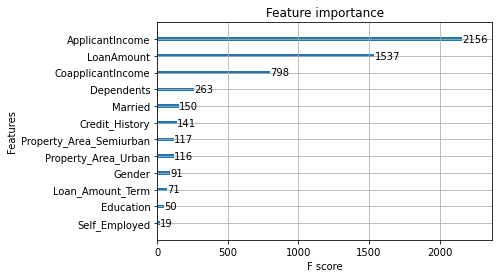

In [60]:
xgb.plot_importance(xgb_clf)

In [61]:
print("Recall score :{}  Accuracy : {}".format
      (recall_score(y_test,xgb_clf.predict(x_test)),accuracy_score(y_test,xgb_clf.predict(x_test))))

Recall score :0.8  Accuracy : 0.7235772357723578


In [62]:
xgb_clf = xgb.XGBClassifier(n_estimators=250,learning_rate=0.2)

In [63]:
param_test1 = {
 'max_depth':range(4,10,2),
    'gamma' : [0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[0.1,0.5,0.9]
}

In [64]:
grid_search = GridSearchCV(xgb_clf, param_test1,
                           n_jobs=-1, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

cvxg_clf = grid_search.best_estimator_

C:\Users\B.THUSHAR\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:37:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


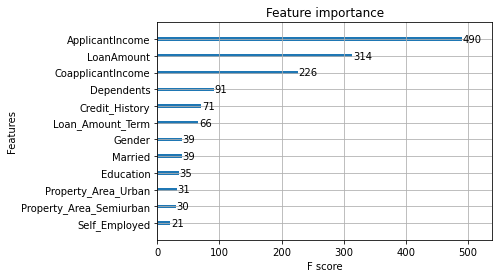

In [66]:
xgb.plot_importance(cvxg_clf)

In [67]:
print("Recall score :{}  Accuracy : {}".format
      (recall_score(y_test,cvxg_clf.predict(x_test)),accuracy_score(y_test,cvxg_clf.predict(x_test))))

Recall score :0.8375  Accuracy : 0.7479674796747967


In [68]:
confusion_matrix(y_test, cvxg_clf.predict(x_test))

array([[25, 18],
       [13, 67]], dtype=int64)

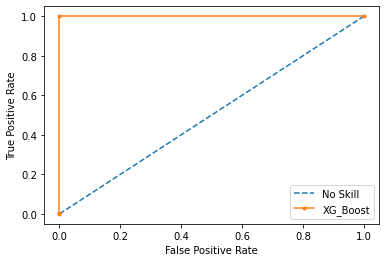

In [70]:
import matplotlib.pyplot as pyplot
yhat = cvxg_clf.predict_proba(x_train)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# pos_probs = yhat
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_train, pos_probs)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='XG_Boost')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SVM classifier

In [72]:
from sklearn import svm

In [85]:
clf_svm_l = svm.SVC(kernel='linear', C=0.005)
clf_svm_l.fit(x_train_s, y_train)

SVC(C=0.005, kernel='linear')

In [86]:
confusion_matrix(y_test, clf_svm_l.predict(x_test_s))

array([[23, 20],
       [ 1, 79]], dtype=int64)

In [87]:
print("Recall score :{}  Accuracy : {}".format
      (recall_score(y_test,clf_svm_l.predict(x_test_s)),accuracy_score(y_test,clf_svm_l.predict(x_test_s))))

Recall score :0.9875  Accuracy : 0.8292682926829268


In [76]:
from sklearn.model_selection import GridSearchCV 

params = {'C':(0.001,0.005,0.01,0.05, 0.1, 0.5, 1, 10, 50)} 

clf_svm_l = svm.SVC(kernel='rbf')

svm_grid_lin = GridSearchCV(clf_svm_l, params, n_jobs=-1,
                            cv=10, verbose=1, scoring='accuracy') 

In [77]:
svm_grid_lin.fit(x_train_s, y_train)

svm_grid_lin.best_params_ 

linsvm_clf = svm_grid_lin.best_estimator_

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  75 out of  90 | elapsed:    4.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    5.4s finished


In [82]:
confusion_matrix(y_test,linsvm_clf.predict(x_test_s))

array([[22, 21],
       [ 1, 79]], dtype=int64)

In [83]:
print("Recall score :{}  Accuracy : {}".format
      (recall_score(y_test,linsvm_clf.predict(x_test_s)),accuracy_score(y_test,linsvm_clf.predict(x_test_s))))

Recall score :0.9875  Accuracy : 0.8211382113821138
